In [7]:
from numpy import exp, logspace, abs, ones
import matplotlib.pyplot as plt
import numpy as np
from robustcontrol import utils

In [8]:
def LI(rk, θmax, w):
    L = np.zeros(np.size(w))
    for i in range(np.size(w)):
        if w[i-1] < np.pi/θmax:
            L[i-1] = np.sqrt(rk**2 + 2*(1+rk)*(1-np.cos(θmax*w[i-1])))
        else:
            L[i-1] = 2 + rk
    return L

In [20]:
kmax = 3
kmin = 2
θmax = 3
rk = (kmax - kmin)/(kmax + kmin)
rk

0.2

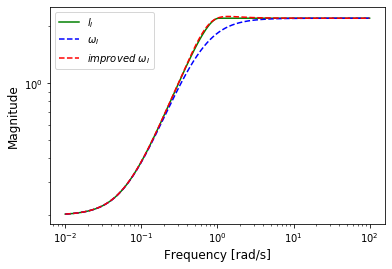

In [22]:
WI = utils.tf([(1 + rk*0.5)*θmax, rk], [θmax*0.5, 1])
WI_improved = WI*utils.tf([(θmax/2.363)**2, 2*0.838*(θmax/2.363), 1], [(θmax/2.363)**2, 2*0.685*(θmax/2.363), 1])

w = np.logspace(-2, 2, 500)
s = 1j*w

plt.loglog(w, LI(rk, 3, w), 'g', label='$l_I$')
plt.loglog(w, np.abs(WI(s)), 'b--', label='$\omega_I$')
plt.loglog(w, np.abs(WI_improved(s)), 'r--', label='$improved$ $\omega_I$')
plt.legend()
plt.xlabel(r'Frequency [rad/s]', fontsize=12)
plt.ylabel(r'Magnitude', fontsize=12)
plt.show()